In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import os
import json

from matplotlib.pyplot import cm
import matplotlib.colors as mcolors


## NCM network, Rossler homogeneous

In [2]:
if not os.path.exists("./images/"): 
    os.makedirs("./images/") 

image_fpath = "./images/"


In [3]:
node_df = pd.read_csv("./data/nodelist.csv")
node_dict =  dict(list(zip(node_df['id'], node_df['node'])))

# Rossler MSF class II, synchronisation error plots

In [4]:
if not os.path.exists("./images/msf2/"): 
    os.makedirs("./images/msf2/") 

image_fpath = "./images/msf2/"


In [5]:
#for i in range(len(clusters)):
        #print(clusters[i])
#    rennamed_cluster_list = [node_dict[num] for num in clusters[i]]
    
#    clusters_dict["C%d"%(i+1)] = rennamed_cluster_list 


In [6]:
df = pd.read_csv("./data/ncm_clusters_rossler.csv")
clusters = df.cluster.tolist()
clusters = [ast.literal_eval(s) for s in clusters]
clusters_dict= {}
for i in range(len(clusters)):
        #print(clusters[i])
        clusters_dict["C%d"%(i+1)] = clusters[i]

In [7]:
files = ["homogeneous_errdict2.npz","heteroParams_errdict2.npz", "heteroA_errdict2.npz"]

lambdas = np.arange(0, 0.5, 0.001)
length = len(lambdas)


In [8]:

def plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df):
    # Set up figure with reduced gap between subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    plt.subplots_adjust(wspace=0.1)  # Reduce gap between subplots
    
    xlim1, xlim2 = [lambdas[0], 0.035], [0.035, 0.4]
    
    # Increase saturation of colors
    base_colors = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
    color = [mcolors.rgb_to_hsv(c[:3]) for c in base_colors]
    for c in color:
        c[1] = min(1, c[1] * 1.5)  # Boost saturation by 50%
    color = [mcolors.hsv_to_rgb(c) for c in color]

    for ax in (ax1, ax2):
        for i in range(len(clusters_dict)):
            cl_num = list(clusters_dict.keys())[i]
            err = clusters_errdict[cl_num]
            
            # Plot mean sync error curve
            ax.plot(
                lambdas[:], 
                np.mean(err[:, :], axis=0), 
                color=color[i], 
                linewidth=3,
                label=f"Cluster {cl_num}"
            )
            
            # Mark critical coupling (dc)
            dc = np.round(df["dc"][df["cluster"] == str(clusters_dict[cl_num])].item(), 5)
            ax.plot(
                dc, 0, 
                alpha=0.7, 
                marker='o', 
                color=color[i], 
                markersize=10,  # Larger marker
                markeredgecolor='k'  # Black border for better visibility
            )
        
        # Plot global error (dashed black line)
        ax.plot(
            lambdas[:], 
            np.mean(clusters_errdict["global_error"][:, :], axis=0),
            "--", 
            color="k", 
            linewidth=3,  # Thicker line
            label="Global error"
        )
    
    # Axis limits
    ax1.set_xlim(xlim1)
    ax2.set_xlim(xlim2)
    ax2.set_ylim([-0.2, 5])
    
    # Labels with larger fonts
    ax1.set_ylabel("Synchronization error", fontsize=20)
    ax1.set_xlabel("coupling strength, $K$", fontsize=20)
    ax2.set_xlabel("coupling strength, $K$", fontsize=20)
    
    # Tick font size
    ax1.tick_params(axis='both', labelsize=16)
    ax2.tick_params(axis='both', labelsize=16)
    
    # Optional: Add legend (adjust position if needed)
    #ax1.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Optional: Add title (uncomment if needed)
    # plt.suptitle("Homogeneous, Rossler MSF II", size=16, y=1.02)

    

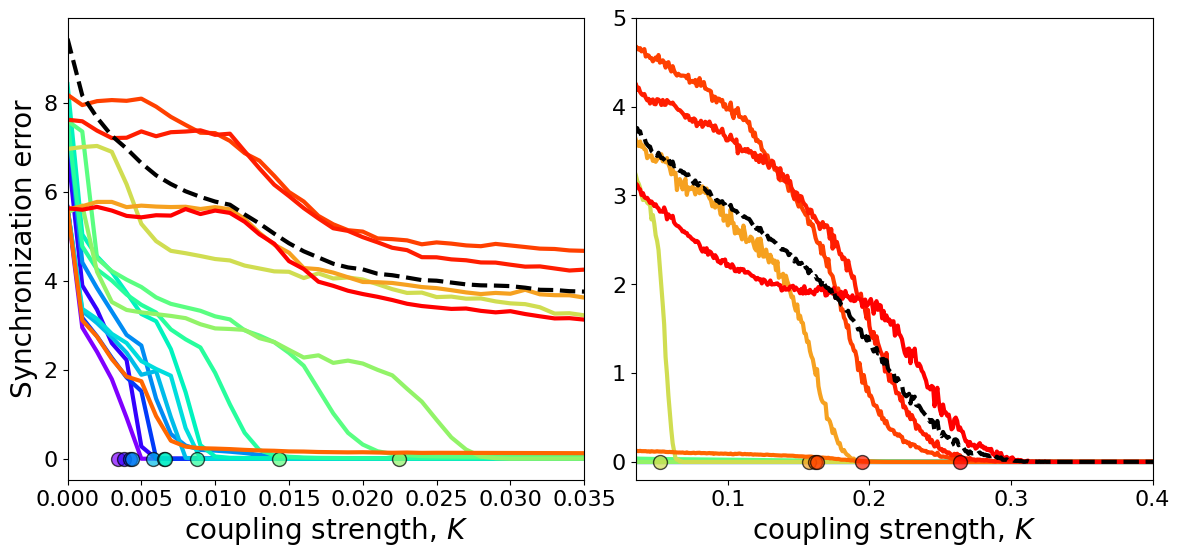

In [9]:
clusters_errdict = np.load("./data/"+files[0])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)


plt.savefig(image_fpath+"homogeneous_msf2.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
plt.show()

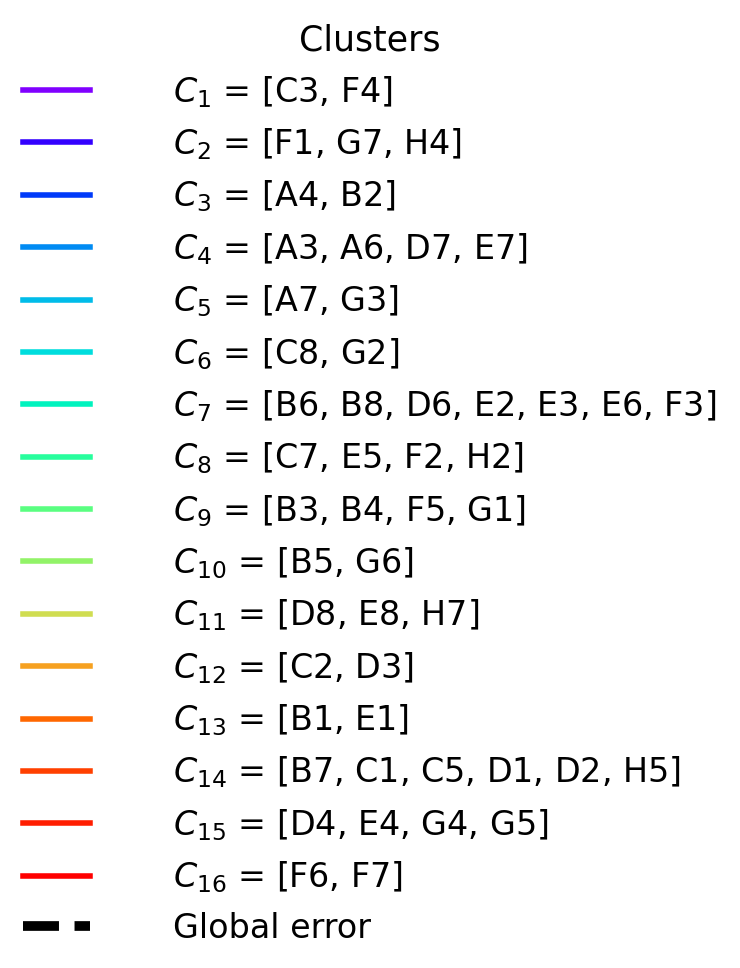

In [10]:
# --- Legend Plot ---

# Create legend elements
# Create plot
# --- Legend Plot ---
plt.figure(figsize=(8, 8))  # Larger figure size

# Increase saturation of colors (same as before)
base_colors = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
color = [mcolors.rgb_to_hsv(c[:3]) for c in base_colors]
for c in color:
    c[1] = min(1, c[1] * 1.5)  # Boost saturation by 50%
color = [mcolors.hsv_to_rgb(c) for c in color]

legend_elements = []
for i in range(len(clusters_dict)):
    cl_num = list(clusters_dict.keys())[i]
    err = clusters_errdict[cl_num]
    
    # Format cluster number with proper LaTeX subscript
    # Extract number after 'C' and convert to subscript
    cluster_num = cl_num[1:]  # Gets the number part after 'C'
    formatted_cl_num = '$C_{' + cluster_num + '}$'  # LaTeX formatted as C_{1}, C_{2} etc.
    
    rennamed_cluster_list = [node_dict[num] for num in clusters_dict[cl_num]]
    
    legend_label = formatted_cl_num+" = [" + ", ".join(rennamed_cluster_list) + "]"
    
    # Add to legend with thicker lines
    legend_elements.append(
        plt.Line2D([0], [0], 
                   linestyle='-', 
                   color=color[i], 
                   label=legend_label, 
                   linewidth=4)  # Thicker line
    )
    
# Add global error entry (dashed line)
legend_elements.append(
    plt.Line2D([0], [0], 
               linestyle='--', 
               color='k', 
               label='Global error', 
               linewidth=7)  # Thicker line
)

# Create legend
plt.axis('off')  # Hide axes
legend = plt.legend(
    handles=legend_elements, 
    loc='center', 
    title="Clusters", 
    frameon=False,  # No legend border
    handletextpad=2.5,  # More space between line and text
    fontsize=24,  # Larger font for labels
    title_fontsize=25  # Larger font for title
)

# Save with high resolution
plt.savefig(
    "./images/clusters_linestyle_legend.pdf", 
    facecolor="white", 
    bbox_inches="tight", 
    dpi=600
)
plt.show()

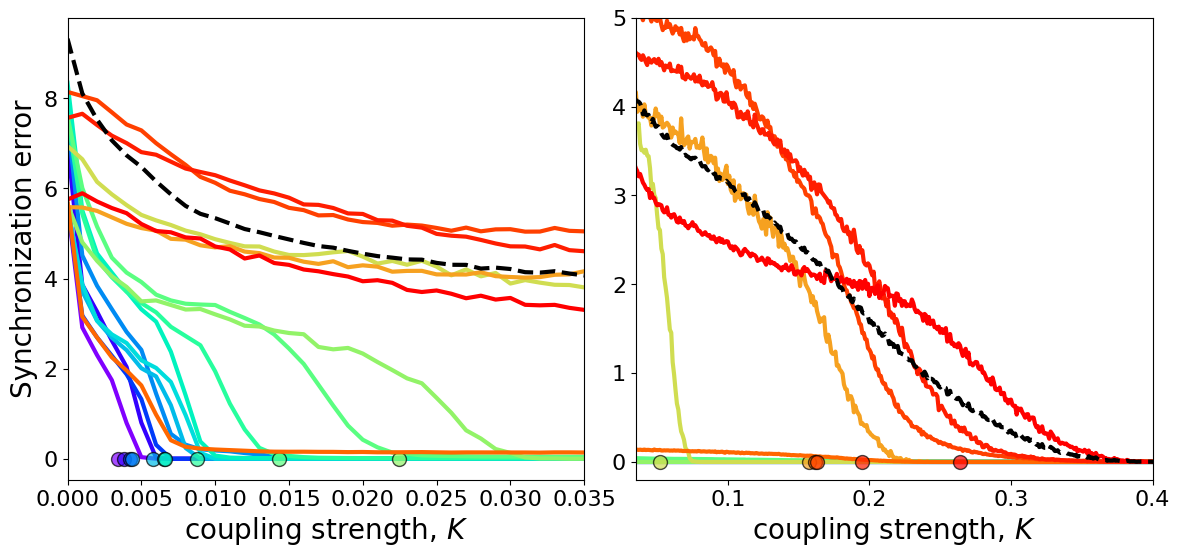

In [11]:
clusters_errdict = np.load("./data/"+files[1])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Parameters (a,b,c), Rossler MSF II")

plt.savefig(image_fpath+"heteroParams_msf2.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
plt.show()

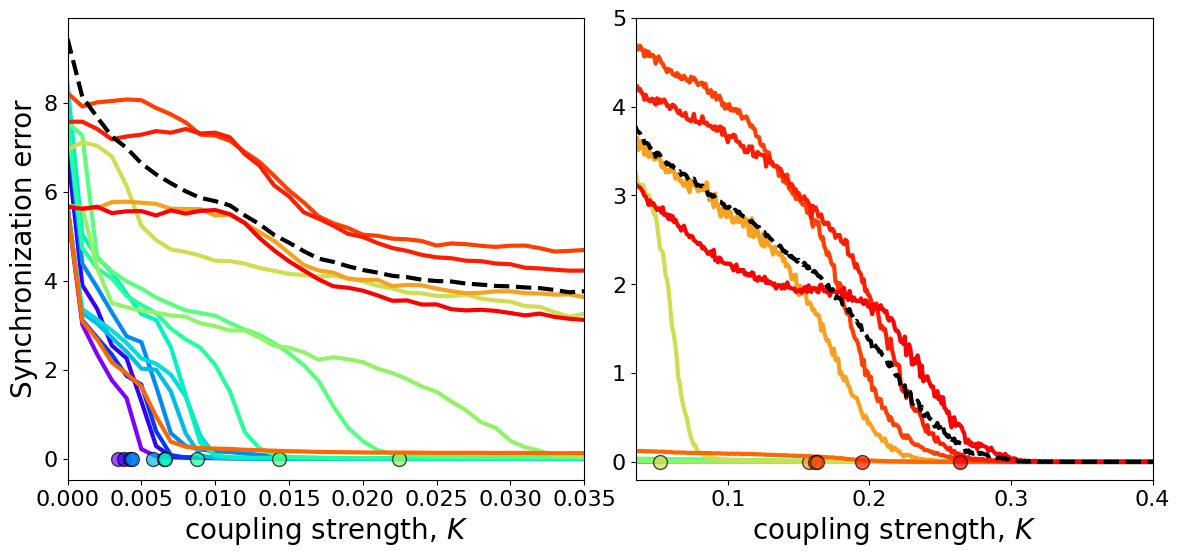

In [12]:
clusters_errdict = np.load("./data/"+files[2])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Link weights, Rossler MSF II")

plt.savefig(image_fpath+"heteroA_msf2.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
plt.show()

# Rossler MSF class III, synchronisation error plots

In [13]:
if not os.path.exists("./images/msf3/"): 
    os.makedirs("./images/msf3/") 

image_fpath = "./images/msf3/"


In [14]:
files = ["homogeneous_errdict3.npz","heteroParams_errdict3.npz", "heteroA_errdict3.npz"]
lambdas = np.arange(0, 1.5, 0.001)
length = len(lambdas)


In [15]:
from matplotlib.pyplot import cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

def plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df):
    # Set up figure with reduced gap between subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    plt.subplots_adjust(wspace=0.1)  # Reduce gap between subplots
    
    xlim1, xlim2 = [lambdas[0], 0.035], [0.035, 1.5]
    
    # Increase saturation of colors
    base_colors = cm.rainbow(np.linspace(0, 1, len(clusters_dict)))
    color = [mcolors.rgb_to_hsv(c[:3]) for c in base_colors]
    for c in color:
        c[1] = min(1, c[1] * 1.5)  # Boost saturation by 50%
    color = [mcolors.hsv_to_rgb(c) for c in color]

    for ax in (ax1, ax2):
        for i in range(len(clusters_dict)):
            cl_num = list(clusters_dict.keys())[i]
            err = clusters_errdict[cl_num]
            
            # Plot mean sync error curve
            ax.plot(
                lambdas[:], 
                np.mean(err[:, :], axis=0), 
                color=color[i], 
                linewidth=3,
                label=f"Cluster {cl_num}"
            )
            
            # Mark critical coupling (dc1)
            dc1 = np.round(df["dc1"][df["cluster"] == str(clusters_dict[cl_num])].item(), 5)
            ax.plot(
                dc1, 0, 
                alpha=0.7, 
                marker='o', 
                color=color[i], 
                markersize=10,  # Larger marker
                markeredgecolor='k'  # Black border for visibility
            )
        
        # Plot global error (dashed black line)
        ax.plot(
            lambdas[:], 
            np.mean(clusters_errdict["global_error"][:, :], axis=0),
            "--", 
            color="k", 
            linewidth=3,  # Thicker line
            label="Global error"
        )

    # Desynchronization markers (only for ax2)
    for i in range(8):  # Assuming 8 clusters; adjust if needed
        cl_num = list(clusters_dict.keys())[i]
        dc2 = np.round(df["dc2"][df["cluster"] == str(clusters_dict[cl_num])].item(), 5)
        ax2.plot(
            dc2, 0, 
            alpha=0.7, 
            marker='s',  # Square marker
            color=color[i], 
            markersize=10,  # Larger marker
            markeredgecolor='k'  # Black border
        )
    
    # Axis limits
    ax1.set_xlim(xlim1)
    ax2.set_xlim(xlim2)
    ax2.set_ylim([-0.2, 5])
    
    # Labels with larger fonts
    ax1.set_ylabel("Synchronization error", fontsize=20)
    ax1.set_xlabel("coupling strength, $K$", fontsize=20)
    ax2.set_xlabel("coupling strength, $K$", fontsize=20)
    
    # Tick font size
    ax1.tick_params(axis='both', labelsize=16)
    ax2.tick_params(axis='both', labelsize=16)
    
    # Optional: Add legend (uncomment if needed)
    # ax1.legend(fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Optional: Add title (uncomment if needed)
    # plt.suptitle("Homogeneous, Rossler MSF III", size=16, y=1.02)

    #plt.show()

In [16]:
image_fpath

'./images/msf3/'

In [17]:
files[0]

'homogeneous_errdict3.npz'

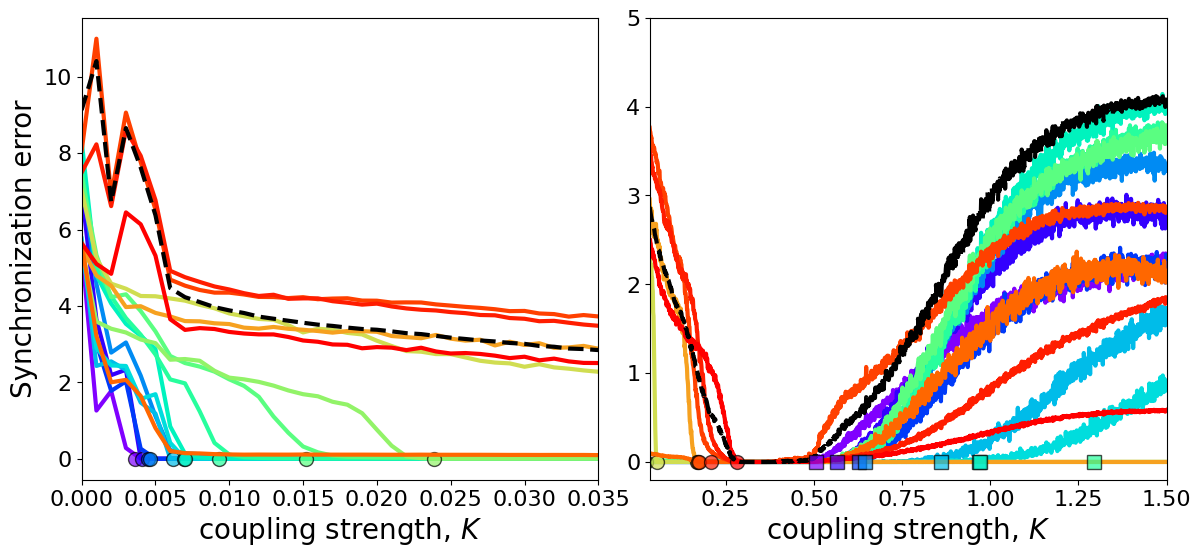

In [18]:
clusters_errdict = np.load("./data/"+files[0])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Homogeneous, Rossler MSF III", size=15)
plt.savefig(image_fpath+"homogeneous_msf3.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
plt.show()

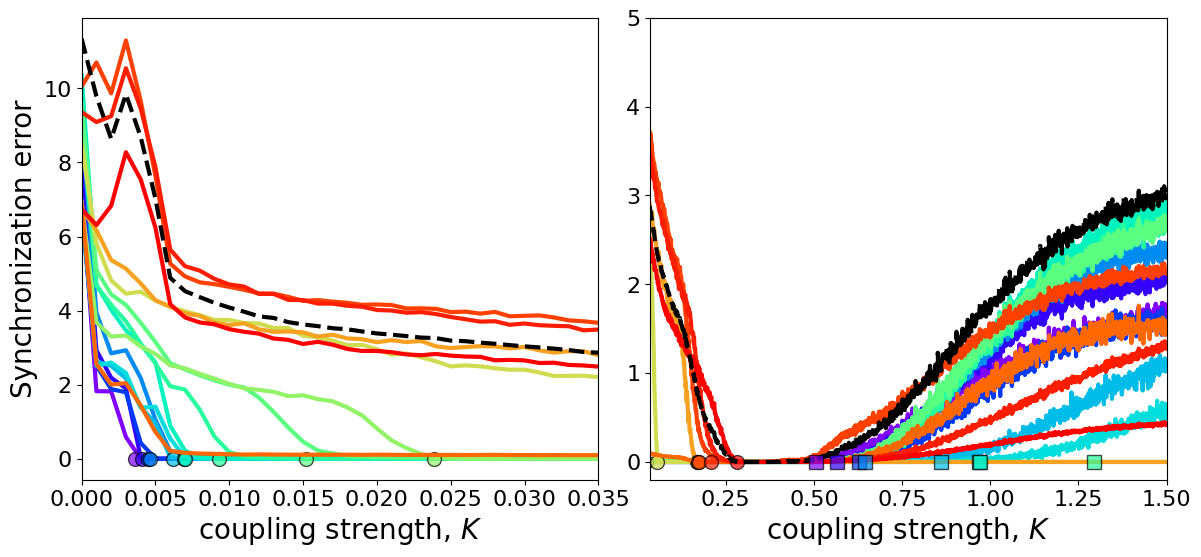

In [19]:
clusters_errdict = np.load("./data/"+files[1])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Parameters (a,b,c), Rossler MSF III")

plt.savefig(image_fpath+"heteroParams_msf3.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
plt.show()



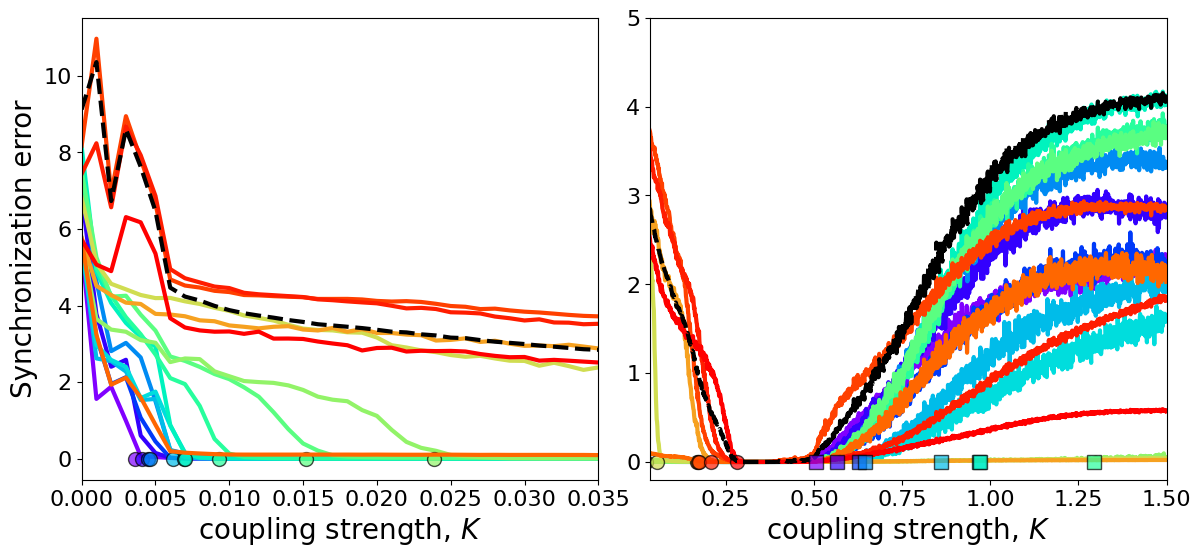

In [20]:
clusters_errdict = np.load("./data/"+files[2])

plot_syncErr_curves(clusters_errdict, clusters_dict, lambdas, df)

#plt.suptitle("Heterogeneous Link weights, Rossler MSF III")

plt.savefig(image_fpath+"heteroA_msf3.pdf", 
                facecolor="white", bbox_inches="tight", dpi=600)
#plt.close()
plt.show()